  Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  Longitude  \
0  200501BS00001               525680.0                178240.0  -0.191170   
1  200501BS00002               524170.0                181650.0  -0.211708   
2  200501BS00003               524520.0                182240.0  -0.206458   
3  200501BS00004               526900.0                177530.0  -0.173862   
4  200501BS00005               528060.0                179040.0  -0.156618   

    Latitude  Police_Force  Accident_Severity  Number_of_Vehicles  \
0  51.489096             1                  2                   1   
1  51.520075             1                  3                   1   
2  51.525301             1                  3                   2   
3  51.482442             1                  3                   1   
4  51.495752             1                  3                   1   

   Number_of_Casualties        Date  ...  \
0                     1  04/01/2005  ...   
1                     1  05/

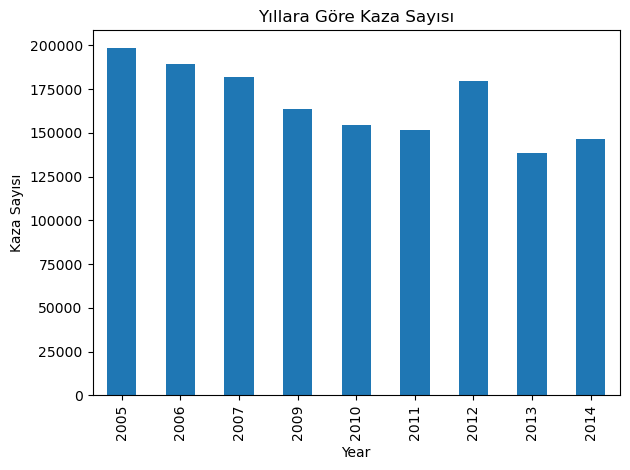


Kırsal vs Kentsel Kaza Sayısı:
Urban_or_Rural_Area
1    972007
2    532011
3       132
Name: count, dtype: int64


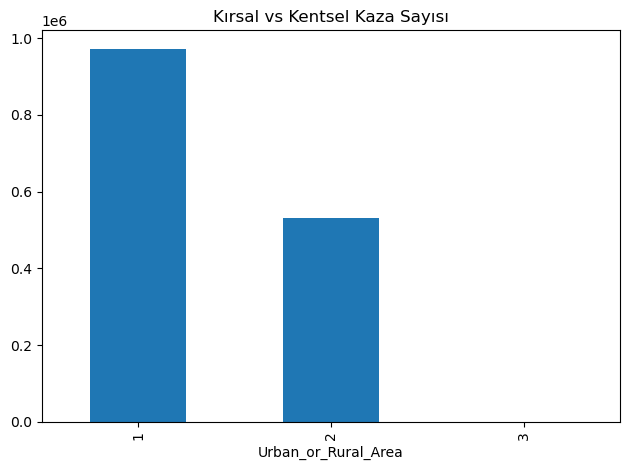


Yıllık Trafik Yoğunluğu:
AADFYear
2005    347396323
2006    353121919
2007    351573906
2009    346712517
2010    342779848
2011    343438806
2012    343066143
2013    343388752
2014    350177015
Name: AllMotorVehicles, dtype: int64


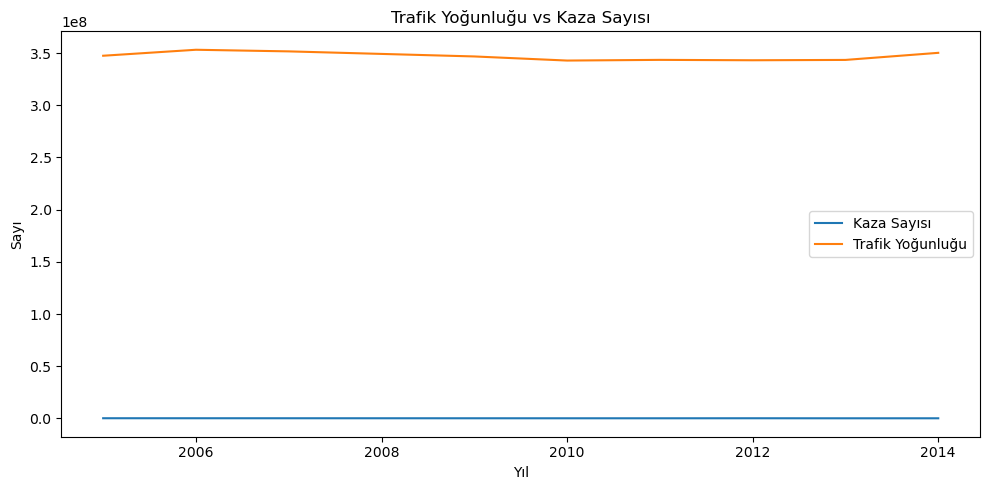


Yol Tipine Göre Kaza Sayısı:
Road_Type
Single carriageway    1126951
Dual carriageway       221741
Roundabout             100463
One way street          30981
Slip road               15668
Unknown                  8346
Name: count, dtype: int64


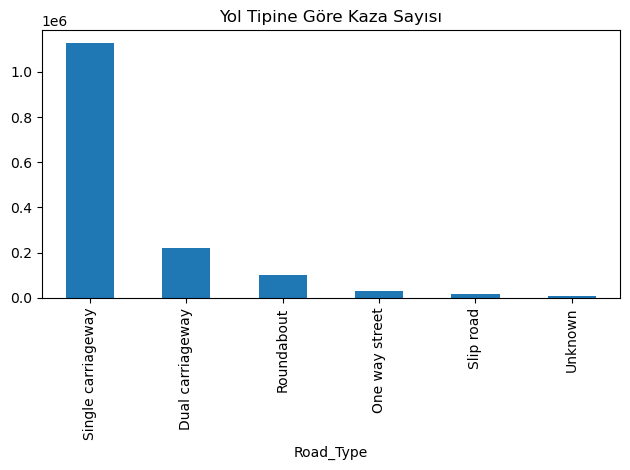


 Trafik Kazaları Analizi Tamamlandı: UK Traffic Accidents


In [10]:
# Trafik Kazaları Analiz Projesi
# UK trafik kazaları ve trafik yoğunluğu verileriyle kaza trendi, artış faktörleri ve bölgesel farkları analiz eder. __define-ocg__

import pandas as pd
import matplotlib.pyplot as plt

# Gerekli değişken
varOcg = "UK Traffic Accidents"

# Verileri Yükle (low_memory=False eklenerek)
df1 = pd.read_csv("accidents_2005_to_2007.csv", low_memory=False)
df2 = pd.read_csv("accidents_2009_to_2011.csv", low_memory=False)
df3 = pd.read_csv("accidents_2012_to_2014.csv", low_memory=False)
df_traffic = pd.read_csv("ukTrafficAADF.csv", low_memory=False)

# Tüm kaza verilerini birleştir
df_accidents = pd.concat([df1, df2, df3], ignore_index=True)

# İlk Bakış
print(df_accidents.head())
print(df_traffic.head())

# Tarih sütununu dönüştür (dayfirst=True)
df_accidents['Date'] = pd.to_datetime(df_accidents['Date'], dayfirst=True)
df_accidents['Year'] = df_accidents['Date'].dt.year

# Yıllara Göre Kaza Sayısı
accidents_per_year = df_accidents.groupby('Year').size()
print("\nYıllara Göre Kaza Sayısı:")
print(accidents_per_year)

accidents_per_year.plot(kind='bar', title='Yıllara Göre Kaza Sayısı', ylabel='Kaza Sayısı')
plt.tight_layout()
plt.show()

# Kırsal vs Kentsel Alan Karşılaştırması
if 'Urban_or_Rural_Area' in df_accidents.columns:
    rural_urban = df_accidents['Urban_or_Rural_Area'].value_counts()
    print("\nKırsal vs Kentsel Kaza Sayısı:")
    print(rural_urban)
    rural_urban.plot(kind='bar', title='Kırsal vs Kentsel Kaza Sayısı')
    plt.tight_layout()
    plt.show()
else:
    print("Urban_or_Rural_Area sütunu bulunamadı.")

# Trafik Akışı ile Kaza Karşılaştırması
year_col = 'AADFYear' if 'AADFYear' in df_traffic.columns else 'Year'
motor_col = 'AllMotorVehicles' if 'AllMotorVehicles' in df_traffic.columns else 'All_Motor_Vehicles'

if year_col in df_traffic.columns and motor_col in df_traffic.columns:
    traffic_per_year = df_traffic.groupby(year_col)[motor_col].sum()
    traffic_per_year = traffic_per_year[traffic_per_year.index.isin(accidents_per_year.index)]
    print("\nYıllık Trafik Yoğunluğu:")
    print(traffic_per_year)

    plt.figure(figsize=(10,5))
    plt.plot(accidents_per_year.index, accidents_per_year.values, label='Kaza Sayısı')
    plt.plot(traffic_per_year.index, traffic_per_year.values, label='Trafik Yoğunluğu')
    plt.title('Trafik Yoğunluğu vs Kaza Sayısı')
    plt.xlabel('Yıl')
    plt.ylabel('Sayı')
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("Trafik veri setinde beklenen sütunlar bulunamadı.")

# Kaza Oranlarını Artıran Faktörler (Örnek: Yol Tipi)
if 'Road_Type' in df_accidents.columns:
    road_type_counts = df_accidents['Road_Type'].value_counts()
    print("\nYol Tipine Göre Kaza Sayısı:")
    print(road_type_counts)
    road_type_counts.plot(kind='bar', title='Yol Tipine Göre Kaza Sayısı')
    plt.tight_layout()
    plt.show()
else:
    print("Road_Type sütunu bulunamadı.")

print(f"\n Trafik Kazaları Analizi Tamamlandı: {varOcg}")
